Data:
- CDS EURO-CORDEX climatic data for 2m air temperature 2026-2041 ... 2100? and instrumental preiod 2016-2020 (11km spatial; 1day temporal) ### CDS API
####
- CDS EURO-CORDEX Heat-wave projections rcp 4.5 rcp 8.5 (11km) ### https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-heat-and-cold-spells?tab=form
####
- CDS Climate variables for cities (only for bigger EU cities, NOT for the EU) (100m) in Europe from 2008 to 2017 ### https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-urban-climate-cities?tab=overview
####
- SENTINEL2 data for Vegetation characteristics (10-20m spatial; 5-10 days temporal) (NDVI, NDWI, LAI, NDDI, NDBI) ### https://dataspace.copernicus.eu/browser/?zoom=3&lat=26&lng=0&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30
####
- LANDSAT8 land surface temperature for the 2016-2020 (15-30m spatial; 8-16 days tremporal) ### https://rslab.gr/downloads_LandsatLST.html
####
- CHELSA climatic data downscaled from CMIP6 (1km spatial; monthly values, daily values are not available) ### https://envicloud.wsl.ch/#/?prefix=chelsa%2Fchelsa_V2%2FGLOBAL%2F ### https://chelsa-climate.org/
####

Process:
1. LANDSAT8 (30m) for the identification of the overheated areas.
####
2. SENTINEL2 for the computation of the Vegetation characteristics, find places suitable for the green measures NDVI, NDWI,
NDDI, NDBI (done)
####
3. EURO-CORDEX data for the Heat-wave events. The data from Euro-Corex are already precalculated for specific cities in EU.
####
4. CHELSA data for the Heat-Wave events extraction. We need the daily data (we need to ask for data, and there is the problem with the data volume to store) or precalculated Heat-waves.  
####
5. CRITICAL INFRASTRUCTURE data from Zilina. For example if the critical areas are in the most populated areas. 

Future steps:
1. Automatization of the data downloading processes.

2. Ask the Chelsa creators for cooperation.

3. Agree for the common metodology for heat-wave extraction (PesetaIV,Thermofeel ....)

## https://github.com/CLIMAAX/HEATWAVES


# Import packages

If there be some problems with the instalation of the packages, please let me know. I experience difficulties with the cartopy package. 

In [1]:
import zipfile        # working with the zip folders #
import os             # handling the current working directory
import rasterio       # netcdf and raster processing  #
from pathlib import Path # file system paths
import rioxarray as rxr # netcdf and raster processing
#import leafmap
#import leafmap.colormaps as cm
import cdsapi         # API downloading
import numpy as np    # 2-3D array data handling
import pandas as pd   # data handling #
import xarray as xr   # 2-3D array data handling 
#import geopandas as gpd
from osgeo import gdal # Geo data handling 
#import cordex as cx
import cartopy.crs as ccrs # netcdf data projection 
import cartopy.feature as cf # netcdf data projection 
import cartopy.crs as ccrs # netcdf data projection 
import matplotlib as mpl  #  data plot #
import matplotlib.pyplot as plt #  data plot #
from rasterio.crs import CRS  #  raster dat handling 
from pylab import pcolormesh,show,colorbar,plot,title,legend,subplot,savefig
from xrspatial.classify import reclassify
from matplotlib import pyplot
from rasterio.plot import show
from glob import glob
import geopandas as gpd
import rasterio as rio
#from pathlib import Path

# Create a directory structure

In [3]:
workflow_folder = 'Heat_workflow'
if not os.path.exists(workflow_folder):
    os.makedirs(workflow_folder)
    os.makedirs(os.path.join(workflow_folder, 'data'))
    os.makedirs(os.path.join(workflow_folder, 'results'))

# Downloading of the Euro-Cordex data for max, min and mean air temperature (API) 

Manual for the use of the CDS API: https://cds.climate.copernicus.eu/api-how-to

In [4]:
data_dir = os.path.join(workflow_folder,'data')
results_dir = os.path.join(workflow_folder,'results')

For the downloading of the data you need to login to Copernicus Climate Data Store, where you will find yours KEY for data downloading. 

In [5]:
# Change KEY!!!
URL = "https://cds.climate.copernicus.eu/api/v2"
KEY = "Change KEY!!!"
c = cdsapi.Client(url=URL, key=KEY)


DATADIR = data_dir
data = c.retrieve(
    "projections-cordex-domains-single-levels",
    {
           "domain": "europe",
           "experiment": "rcp_8_5",
           "horizontal_resolution": "0_11_degree_x_0_11_degree",
           "temporal_resolution": "daily_mean",
           "variable": [
               "2m_air_temperature", "maximum_2m_temperature_in_the_last_24_hours", "minimum_2m_temperature_in_the_last_24_hours",
           ],
           "gcm_model": "cnrm_cerfacs_cm5",
           "rcm_model": "clmcom_clm_cclm4_8_17",
           "ensemble_member": "r1i1p1",
            "start_year": [
                "2023", "2024", "2025","2026", "2027", "2028", "2029", "2030", "2031", "2032", "2033", "2034", "2035",
                "2026", "2027", "2028","2029", "2030", "2031", "2032", "2033", "2034", "2035", "2036", "2037", "2038",
                "2039", "2040",
            ],
            "end_year": [
                "2023", "2024", "2025","2026", "2027", "2028", "2029", "2030", "2031", "2032", "2033", "2034", "2035",
                "2026", "2027", "2028","2029", "2030", "2031", "2032", "2033", "2034", "2035", "2036", "2037", "2038",
                "2039", "2040",
            ],
           "format": "zip",
    },
   f"{DATADIR}/era5_daily_t2m_eurminmax_2040.zip")

2023-10-16 13:33:06,705 INFO Welcome to the CDS
2023-10-16 13:33:06,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cordex-domains-single-levels
2023-10-16 13:33:06,906 INFO Request is queued
2023-10-16 13:33:07,982 INFO Request is running
2023-10-16 13:41:26,977 INFO Request is completed
2023-10-16 13:41:26,988 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/dataset-projections-cordex-domains-single-levels-31cd50bb-8a9f-467c-bed6-313439fc542a.zip to Heat_workflow\dataera5_daily_t2m_eurminmax_2040.zip (5.8G)
2023-10-16 14:22:38,079 INFO Download rate 2.4M/s                                                                      


# Load of the Euro-Cordex daily mean data 

Downloaded data are in the 5 year step. For the load of the data we need to select the directory and then start computing:
1. Load the data for 3 five years periods
2. Convert the unit from K to C 
3. Calculate the monthly means values
4. Set CRS to rotated pole 
5. Save the data on the disk

In [7]:
# the data are for 5 year periods, you can select one which you prefer or merge all in one...
tm = f'{data_dir}/era5_daily_t2m_eurminmax_2040/tas_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20260101-20301231.nc'
dm=xr.open_dataset(tm)
dm=xr.decode_cf(dm,decode_coords="all") ## https://docs.xarray.dev/en/stable/generated/xarray.open_dataarray.html

Convert from K to °C, and computing of the monthly mean values

In [8]:
da_m=dm['tas']
tas=da_m -273.15
tas=tas.assign_attrs(da_m.attrs)
tas.attrs['units']='°C'
monthly_mean = tas.groupby('time.month').mean(keep_attrs=True)

 Plot of the data

Text(0.5, 1.0, 'T monthly mean projection for specific month')

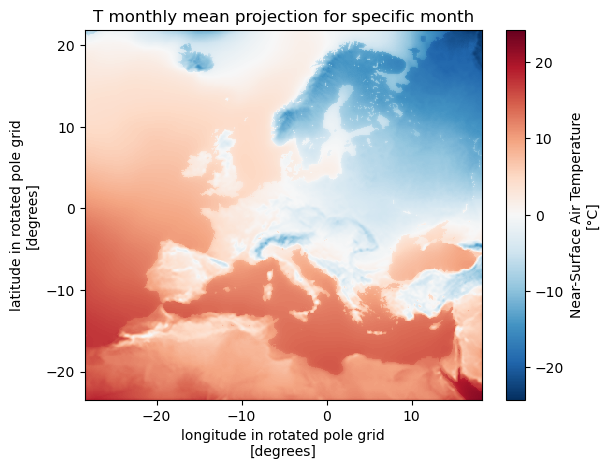

In [9]:
# you can select the month (0=January, ...., 11=December)
monthly_mean[0,:,:].plot()
plt.title('T monthly mean projection for specific month') 

Setting of the CRS - If you want to save the data and work with then in QGIS, you need to set the CRS to rotated pole

In [ ]:
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
monthly_mean.rio.write_crs(rotated_pole, inplace=True)
monthly_mean.to_netcdf(path= data_dir, mode='w', format='NETCDF4')

# Euro-Cordex T max for Heat-Wave   

For The heat-wave we use the daily maximum temperature. 
1. Load the data, then merge it to 2026-2040
2. Convert the unit from K to C
3. Calculate the maximum monthly means values
4. Set CRS to rotated pole
5. Save the data on the disk
6. Divide data to months = preparation for the Heat-wave segregation
7. Clip data to pilot site

In [ ]:
# the data are for 5 year periods, you can select one which you prefer or merge all in one... 
tmax = f'{data_dir}era5_daily_t2m_eurminmax_2040/tasmax_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20260101-20301231.nc'
dmax=xr.open_dataset(tmax)
dmax=xr.decode_cf(dmax,decode_coords="all") ## https://docs.xarray.dev/en/stable/generated/xarray.open_dataarray.html

Text(0.5, 1.0, 'T monthly mean projection for specific month')

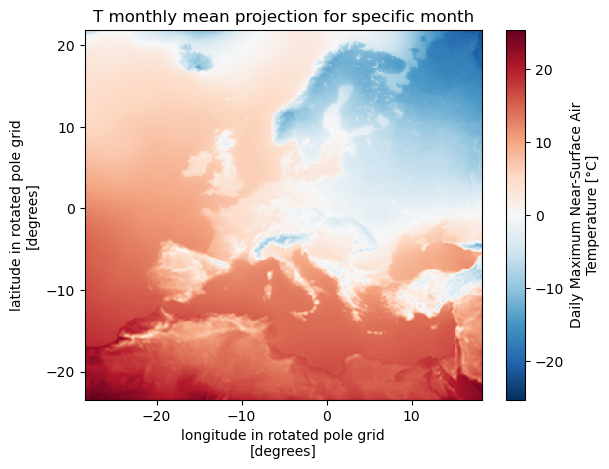

In [13]:
dmax=dmax['tasmax']
tasmax=dmax - 273.15
tasmax=tasmax.assign_attrs(dmax.attrs)
tasmax.attrs['units']='°C'
max_monthly_mean = tasmax.groupby('time.month').mean(keep_attrs=True)


Plot of the data 

In [ ]:
# you can select the month (0=January, ...., 11=December)
max_monthly_mean[0,:,:].plot()
plt.title('T monthly mean projection for specific month')

Setting of the CRS - If you want to save the data and work with then in QGIS, you need to set the CRS to rotated pole

In [14]:
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
max_monthly_mean.rio.write_crs(rotated_pole, inplace=True)
max_monthly_mean.to_netcdf(path=data_dir, mode='w', format='NETCDF4')

#### Didive data to the months  

In [16]:
# Use .groupby('time.month') to organize the data into months
# then use .groups to extract the indices for each month
tasmax_month=tasmax.groupby('time.month').groups

# Extract the time indices corresponding to all Junes, Julys, and Augusts  
jun_idxs=tasmax_month[6]
jul_idxs=tasmax_month[7]
aug_idxs=tasmax_month[8]

# Extract the january months by selecting 
# the relevant indices
jun_max=tasmax.isel(time=jun_idxs)
jul_max=tasmax.isel(time=jul_idxs)
aug_max=tasmax.isel(time=aug_idxs)

#### Setting of th CRS 

In [17]:
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)

In [18]:
jun_max.rio.write_crs(rotated_pole, inplace=True)
jul_max.rio.write_crs(rotated_pole, inplace=True)
aug_max.rio.write_crs(rotated_pole, inplace=True)

<xarray.DataArray 'tasmax' (time: 155, rlat: 412, rlon: 424)>
array([[[ 2.5519684e+01,  2.5535370e+01,  2.5560181e+01, ...,
          2.7080017e+01,  2.7242584e+01,  2.7417755e+01],
        [ 2.5352386e+01,  2.5366119e+01,  2.5387329e+01, ...,
          2.6964233e+01,  2.7174896e+01,  2.7389343e+01],
        [ 2.5102783e+01,  2.5061798e+01,  2.5060974e+01, ...,
          2.6888062e+01,  2.7147675e+01,  2.7359680e+01],
        ...,
        [-1.7039185e+00, -1.7157593e+00, -1.0723572e+00, ...,
         -8.1273193e+00, -6.9174194e+00, -6.0684509e+00],
        [-1.9319763e+00, -1.5747681e+00, -7.5332642e-01, ...,
         -7.6708679e+00, -6.7821350e+00, -6.2133179e+00],
        [-2.1082153e+00, -1.4781494e+00,  2.8198242e-02, ...,
         -6.7959290e+00, -6.5736389e+00, -5.7239380e+00]],

       [[ 2.5682068e+01,  2.5684204e+01,  2.5701141e+01, ...,
          2.6663727e+01,  2.6939972e+01,  2.7288086e+01],
        [ 2.5669342e+01,  2.5676392e+01,  2.5681213e+01, ...,
          2.6555389e+01,  2.6907501e+01,  2.7294006e+01],
        [ 2.5615173e+01,  2.5630981e+01,  2.5680267e+01, ...,
          2.6520294e+01,  2.6953552e+01,  2.7291504e+01],
...
        [-9.2211914e-01, -1.0971375e+00, -6.0296631e-01, ...,
         -1.2823608e+01, -1.3538940e+01, -1.3381317e+01],
        [-1.2240601e+00, -1.0096741e+00, -1.7761230e-01, ...,
         -1.3083801e+01, -1.4907166e+01, -1.3664764e+01],
        [-1.6204224e+00, -1.1155701e+00,  8.9904785e-02, ...,
         -1.3431061e+01, -1.4211792e+01, -1.4194458e+01]],

       [[ 2.7132599e+01,  2.7134644e+01,  2.7148712e+01, ...,
          2.2364227e+01,  2.2432770e+01,  2.2582031e+01],
        [ 2.6797394e+01,  2.6760193e+01,  2.6756348e+01, ...,
          2.2272949e+01,  2.2377197e+01,  2.2612366e+01],
        [ 2.6384399e+01,  2.6235718e+01,  2.6164185e+01, ...,
          2.2231079e+01,  2.2372009e+01,  2.2675415e+01],
        ...,
        [-1.0381165e+00, -1.2444458e+00, -8.3996582e-01, ...,
         -1.2742035e+01, -1.2719360e+01, -1.2186920e+01],
        [-1.3425293e+00, -1.1119995e+00, -2.8421021e-01, ...,
         -1.3298889e+01, -1.3368225e+01, -1.2664825e+01],
        [-1.6441345e+00, -9.6032715e-01,  5.6558228e-01, ...,
         -1.3371765e+01, -1.3984711e+01, -1.3356720e+01]]], dtype=float32)
Coordinates:
  * time                        (time) datetime64[ns] 2026-12-01T12:00:00 ......
  * rlat                        (rlat) float64 -23.38 -23.26 ... 21.73 21.83
  * rlon                        (rlon) float64 -28.38 -28.26 ... 18.05 18.16
    rotated_latitude_longitude  int32 ...
    lat                         (rlat, rlon) float32 ...
    lon                         (rlat, rlon) float32 ...
    height                      float64 ...
    spatial_ref                 int32 0
Attributes:
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    comment:           daily-maximum near-surface (usually, 2 meter) air temp...
    units:             °C
    cell_methods:      time: maximum
    history:           2014-03-26T13:11:29Z altered by CMOR: Treated scalar d...
    associated_files:  gridspecFile: gridspec_atmos_fx_CLMcom-CCLM4-8-17_rcp8...

#### Clip data to pilot site

In [19]:
# Clip data to Zilina for specific month, you can select your own clip_box
jun_maxZA = jun_max.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,)
jul_maxZA = jul_max.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,)
aug_maxZA = aug_max.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,)

# For the Heat-wave segregation we used the 90 percentile

We used the methodology from the PESETA IV project https://joint-research-centre.ec.europa.eu/peseta-projects/jrc-peseta-iv_en

The HWMId is defined as the maximum magnitude of heat waves in a year. Specifically, a heat wave is defined as a period ≥ 3 consecutive days with maximum temperature above a daily threshold calculated for a 30-year-long reference period. At least 30-year time series of daily vales are needed to obtain a robust estimation of the indicator. The threshold is defined as the 90th percentile of daily maxima temperature, centred on a 31-day window.

In [20]:
# 90 quantile for ZA for specific month
junq90_maxZA=jun_maxZA.quantile(0.9,dim=None, method='linear', keep_attrs=None, skipna=None, interpolation=None)
julq90_maxZA=jul_maxZA.quantile(0.9,dim=None, method='linear', keep_attrs=None, skipna=None, interpolation=None)
augq90_maxZA=aug_maxZA.quantile(0.9,dim=None, method='linear', keep_attrs=None, skipna=None, interpolation=None)

In [21]:
# 90 condition for ZA
heatjunZA=xr.where(jun_maxZA>junq90_maxZA, 1, 0)
heatjulZA=xr.where(jul_maxZA>julq90_maxZA, 1, 0)
heataugZA=xr.where(aug_maxZA>augq90_maxZA, 1, 0)

#### WRITE ON THE DISK for ZILINA the number of days exceeding the 90 percentile

#### Heat-wave days number for summer months (June, July, August)

Sum of the days which exceed 90 percentile in Zilina 2026-2040, for specific month (heatjunZA - heataugZA)

In [24]:
# you can select he month (heatjulZA)
HWdjun=np.sum(heatjunZA,axis = 0)
HWdjul=np.sum(heatjulZA,axis = 0)
HWdaug=np.sum(heataugZA,axis = 0)

<xarray.DataArray 'tasmax' (rlat: 6, rlon: 4)>
array([[24, 20, 14, 11],
       [26, 21, 15, 11],
       [23, 23, 15, 12],
       [14, 15, 14, 11],
       [12, 12, 14, 11],
       [14, 12, 15, 13]])
Coordinates:
  * rlat                        (rlat) float64 -1.705 -1.595 ... -1.265 -1.155
  * rlon                        (rlon) float64 0.335 0.445 0.555 0.665
    rotated_latitude_longitude  int32 ...
    lat                         (rlat, rlon) float32 ...
    lon                         (rlat, rlon) float32 ...
    height                      float64 ...
    quantile                    float64 0.9
    spatial_ref                 int32 0

In [ ]:
# Plot  Landsat
fig, axes=plt.subplots(ncols=3, figsize=(18,4))
HWdjun.plot(ax=axes[0])
axes[0].set_title('Junes Heat-Wave days for period 2026-2030')
HWdjul.plot(ax=axes[1])
axes[1].set_title('Julys Heat-Wave days for period 2026-2030')
HWdaug.plot(ax=axes[2])
axes[2].set_title('Augusts Heat-Wave days for period 2026-2030')
plt.draw()

Sum of the days which exceed 90 percentile (30 deg from Zilina) on EU map, (this is for better imagination)

In [26]:
HW_EU=np.sum(heatjulZAEU,axis = 0)
HW_EU

<xarray.DataArray 'tasmax' (rlat: 412, rlon: 424)>
array([[155, 155, 155, ..., 155, 155, 155],
       [155, 155, 155, ..., 155, 154, 155],
       [155, 155, 155, ..., 154, 154, 155],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])
Coordinates:
  * rlat                        (rlat) float64 -23.38 -23.26 ... 21.73 21.83
  * rlon                        (rlon) float64 -28.38 -28.26 ... 18.05 18.16
    rotated_latitude_longitude  int32 ...
    lat                         (rlat, rlon) float32 ...
    lon                         (rlat, rlon) float32 ...
    height                      float64 ...
    spatial_ref                 int32 0
    quantile                    float64 0.9

Text(0.5, 1.0, 'Heat-wave days in EU region 2026-2030 with Zilina treshold')

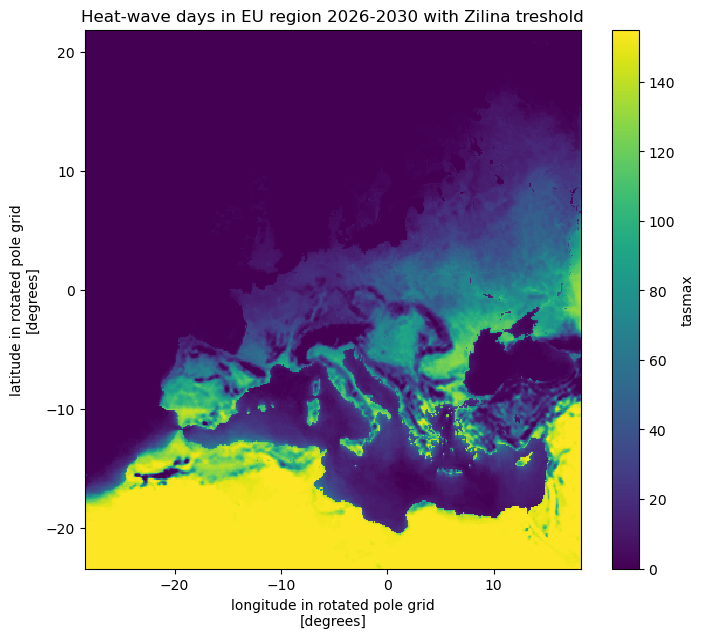

In [27]:
fig, ax=plt.subplots(figsize=(8,7))
HW_EU.plot(ax=ax)
ax.set_title('Heat-wave days in EU region 2026-2030 with Zilina treshold')

# Heat-wave events in pilot site

The heat-wave events segregation for the pilot

# Heat-wave events number in pilot site (Zilina) for specific month

We duplicate the original dataset and move it for 3 days + 1 extra day for the correction. 
1. Copy of the orifinal data ale shift in the time for 3 consecutive days
2. Sum of the Heat-Wave events and plot
3. Write of the CRS and Save

In [31]:
# we select jul 
# Create + time dataset
v=heatjulZA
v1=heatjulZA[:-1,:,:]
v2=heatjulZA[:-2,:,:]
v3=heatjulZA[:-3,:,:]
# Create missing days
t1=heatjulZA[0:1,:,:]
t2=heatjulZA[0:2,:,:]
t3=heatjulZA[0:3,:,:]
# Concatenate missing dates to + time dataset
vi1=xr.concat([t1, v1], dim='time')
vi2=xr.concat([t2, v2], dim='time')
vi3=xr.concat([t3, v3], dim='time')
# Change the time dimesion for correct one
ti=heatjulZA["time"]
# add a time dimension
vi1["time"]=ti
vi2["time"]=ti
vi3["time"]=ti

In [33]:
# Sum of the Heat-Wave
sumv=xr.where((v==1)&(vi1==1)&(vi2==1), 1, 0) # count 3 day HW
sumv2=xr.where((v==1)&(vi1==1)&(vi2==1)&(vi3==1), -1, 0) # delete 4 and more day, it is need to be done because we need to countthe HW as 1
HWa1=sumv.sum(dim='time')
HWa2=sumv2.sum(dim='time')
HWa=HWa1+HWa2
#pcolormesh(HWa);colorbar();title('Heat-Waves events Zilna');show() # let us view the map...

Text(0.5, 1.0, 'Heat-wave days in EU region 2026-2030 with Zilina treshold')

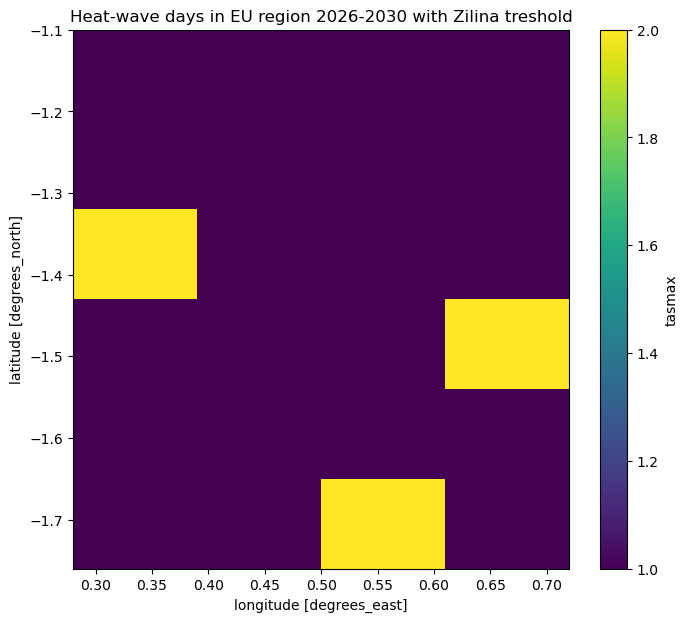

In [34]:
fig, ax=plt.subplots(figsize=(8,7))
HWa.plot(ax=ax)
ax.set_title('Number of Heat-wave events in Zilina July 2026-2030')

# Heat-Waves packages thermofeel, xclim, hotspell  



These are another packages which can be used for the detections of the heat wave events 
Thermofeel, xclim, hotspell are the packages which should be suitable for the extraction of the heat-wave events.  https://pypi.org/project/thermofeel/
## https://pypi.org/project/thermofeel/ 
## https://xclim.readthedocs.io/en/stable/indices.html  
## https://hotspell.readthedocs.io/en/latest/  

# Historical data for the Heat islands identification

The resolution of the Euro-Cordex data (0.1 deg) is too coarse for the detection of the city heat islands. 
We need to agree on the way that we choose for downscaling:
- based on the elevation?
- based on the land use?
- based on the vegetation and drought characteristics?

Data, needs to be manually downloaded from provided websites, it requires registration and manual choosing of your area and time period (except Euro-Cordex):
- Eurocordex climatic data for 2m air temperature 2026-2041 ... 2100? and instrumental preiod 2016-2020 (11km spatial; 1day temporal) ### CDS API
- Sentinel2 data for Vegetation characteristics (10-20m spatial; 5-10 days temporal) (NDVI, NDWI, LAI, NDDI, NDBI) ### https://dataspace.copernicus.eu/browser/?zoom=3&lat=26&lng=0&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30
- Landsat8 land surface temperature for the 2016-2020 (15-30m spatial; 8-16 days tremporal) ### https://rslab.gr/downloads_LandsatLST.html
- CHELSA climatic data downscaled from era-5 (1km spatial; monthly values, daily values are not available) ### https://envicloud.wsl.ch/#/?prefix=chelsa%2Fchelsa_V2%2FGLOBAL%2F ### https://chelsa-climate.org/

Process:
1. With the Landsat8 (30m) data we can identified the Heat-islands in past (done).
2. To train the E-Cordex temperature data in instrumental period for Landsat LST data (need for solution)
3. Use the patterns from instrumental period for creation of the LST maps for E-Cordex temperature projections for finer resolution (need for solution)
4. Use Sentinel2 for the computation of the Vegetation characteristics, find places suitable for the green measures NDVI, NDWI, NDDI, NDBI (done)


# Cordex Historical data 2016-2020

Cordex 2016-2020

In [ ]:
thist = f'{data_dir}/rcp85_daily_t2m_eurminmax_2016/tas_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20160101-20201231.nc'
dhist=xr.open_dataset(thist)
dhist=xr.decode_cf(dhist,decode_coords="all") ## https://docs.xarray.dev/en/stable/generated/xarray.open_dataarray.html

In [ ]:
URL = "https://cds.climate.copernicus.eu/api/v2"
KEY = "CHANGE for your KEY!!!!!!"
c = cdsapi.Client(url=URL, key=KEY)


DATADIR = 'C:\Work\KAJO\CLIMAAX\GitHub\Data_'
data= c.retrieve(
    'projections-cordex-domains-single-levels',
    {
        'domain': 'europe',
        'experiment': 'rcp_8_5',
        'horizontal_resolution': '0_11_degree_x_0_11_degree',
        'temporal_resolution': 'daily_mean',
        'variable': [
            '2m_air_temperature', 'maximum_2m_temperature_in_the_last_24_hours', 'minimum_2m_temperature_in_the_last_24_hours',
        ],
        'gcm_model': 'cnrm_cerfacs_cm5',
        'rcm_model': 'clmcom_clm_cclm4_8_17',
        'ensemble_member': 'r1i1p1',
        'start_year': '2016',
        'end_year': '2020',
        'format': 'zip',
    },
   f"{DATADIR}/rcp85_daily_t2m_eurminmax_2016.zip")

Loading of the Euro-Cordex for observed period 2016-2020

In [ ]:
tm = f'{data_dir}/rcp85_daily_t2m_eurminmax_2016/tmax_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20160101-20201231.nc'
dm=xr.open_dataset(tm)
dm=xr.decode_cf(dm,decode_coords="all") ## https://docs.xarray.dev/en/stable/generated/xarray.open_dataarray.html

- Converting of data from Kelvin to Celsius
- Calculate of the monthly values, for the batter understanding of the sesonality
- Setting of the CRS
- Clipp of the interested area 

In [51]:
##############################################################################
# Cordex maximum daily air temperature 2016-2020 
ecmax='C:/........................./rcp85_daily_t2m_eurminmax_2016/tasmax_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20160101-20201231.nc'
#EC= xr.open_dataset(ec, decode_coords="all")
daECmax= xr.open_dataset(ecmax, decode_coords="all")
dECmax=daECmax['tasmax']
tECmax=dECmax -273.15
tECmax=tECmax.assign_attrs(daECmax.attrs)
tECmax.attrs['units']='°C'
ECmax=tECmax.groupby('time.month').mean(keep_attrs=True)
ECmax=ECmax[6]

Text(0.5, 1.0, 'Cordex Tmax mean July 2016-2020')

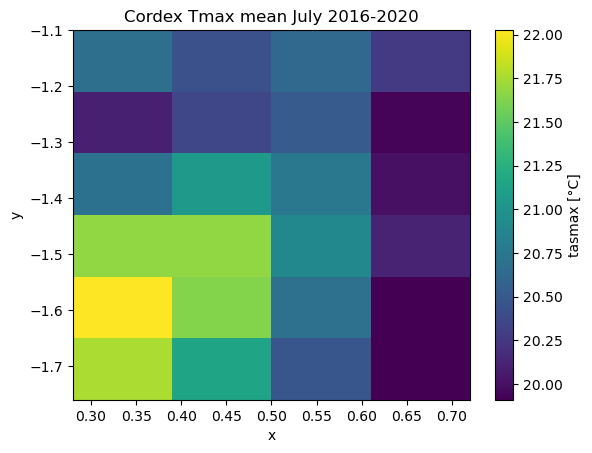

In [54]:
ec='C:/Work/KAJO/CLIMAAX/GitHub/Downscale/ECmaxZA.tif'
#EC= xr.open_dataset(ec, decode_coords="all")
EC= xr.open_dataset(ec)
EC=EC['band_data']
EC=EC[0]
EC.plot()
plt.title('Cordex Tmax mean July 2016-2020')

# Landsat 8 
for Calculation: ttps://www.youtube.com/watch?v=hd7fscNTff4
for Download: https://rslab.gr/downloads_LandsatLST.html

Text(0.5, 1.0, 'Landsat8 LST')

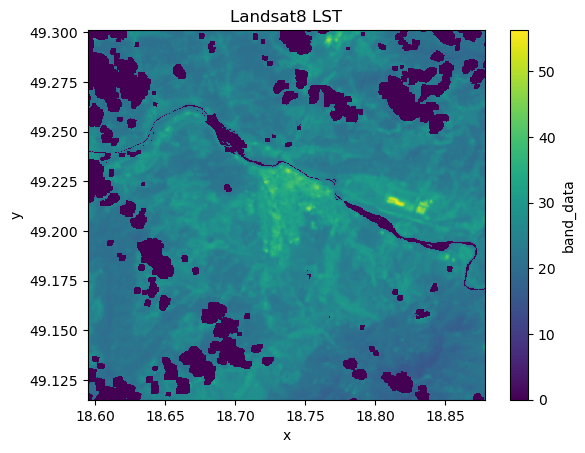

In [41]:
# change of the directory !!!!"
Landsat8='C:/.............../20160721_LS8.tif' ### Change directory !!!
LS8 = xr.open_dataset(Landsat8)
LS=LS8['band_data']
LS.plot()
plt.title('Landsat8 LST')

# Reproject Sentinel (S2), Cordex (EC) and Chelsa (CH) to Landsat (LS)

### Landsat 8, July 2016 land surface temperature 8 days composite

In [42]:
ls='C:/............./Landsat8.nc' ### Change directory !!!
LS= xr.open_dataset(ls, decode_coords="all")
LS=LS['band_data']
#LS.plot()

Text(0.5, 1.0, 'Landsat8 LST July 2016')

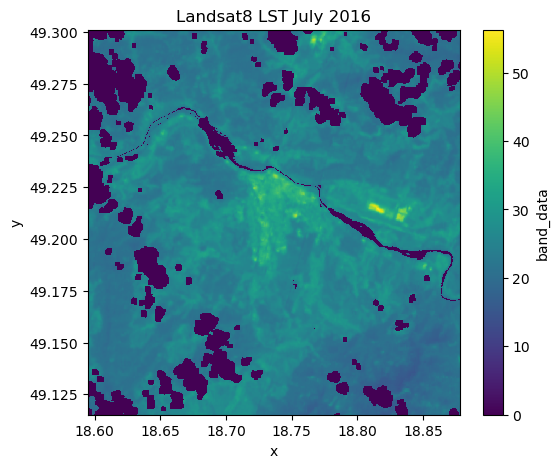

In [44]:
fig, ax=plt.subplots(figsize=(6,5))
LS.plot(ax=ax)
ax.set_title('Landsat8 LST July 2016')

### Sentinel 2, July 2016 spectral band  5 days composite

In [45]:
S2list = glob( "C:/............/*.jp2") # change directory to your folder, for the creation of the Sentinel2 raster stack
#
with rasterio.open(S2list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(S2list))
#
with rasterio.open('C:/......................../Sentinel2/raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(S2list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))
#
S2jul2016='C:/........................./Sentinel2/raster_stack.tif'
S2jul16 = xr.open_dataset(S2jul2016)
S2=S2jul16['band_data']

In [46]:
B1=S2[0]
B2=S2[1]
B3=S2[2]
B4=S2[3]
B5=S2[4]
B6=S2[5]
B7=S2[6]
B8=S2[7]
B9=S2[8]
B10=S2[9]
B11=S2[10]
B12=S2[11]

In [47]:
NDVI=(B8-B4)/(B8+B4)
#NDVI.plot()
NDVI.rio.write_crs("epsg:32633", inplace=True)

<xarray.DataArray 'band_data' (y: 1830, x: 1830)>
array([[ 0.41843137,  0.3242519 ,  0.22710909, ...,  0.42290655,
         0.48683247,  0.48173517],
       [ 0.35447437,  0.34070307,  0.32236442, ...,  0.51062745,
         0.53695226,  0.38261464],
       [ 0.36077586,  0.3715131 ,  0.3184181 , ...,  0.55328   ,
         0.5532206 ,  0.48546028],
       ...,
       [-0.02291476,  0.15678255,  0.3959321 , ...,  0.32764   ,
         0.12697695,  0.12724742],
       [ 0.05472637,  0.32447088,  0.46300212, ...,  0.10618769,
         0.09891492,  0.10442165],
       [ 0.19147474,  0.33264604,  0.5048773 , ...,  0.09349786,
         0.09157626,  0.11987381]], dtype=float32)
Coordinates:
  * x            (x) float64 7e+05 7e+05 7.001e+05 ... 8.097e+05 8.097e+05
  * y            (y) float64 5.5e+06 5.5e+06 5.5e+06 ... 5.39e+06 5.39e+06
    spatial_ref  int32 0

In [48]:
S2_NDVI=NDVI.copy()

In [49]:
S2NDVI84=S2_NDVI.rio.reproject_match(LS)

Text(0.5, 1.0, 'Sentinel2 NDVI for July 2016')

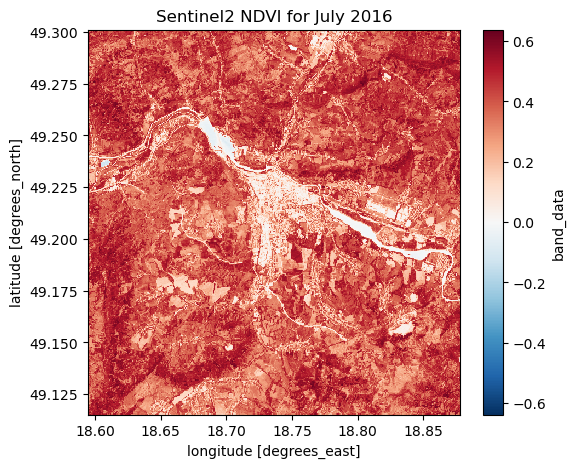

In [50]:
fig, ax=plt.subplots(figsize=(6,5))
S2NDVI84.plot(ax=ax)
ax.set_title('Sentinel2 NDVI for July 2016')

### Euro-Cordex, July 2016 max mean daily air temperature  

In [55]:
EC3=EC.copy()
ECmax84=EC3.rio.reproject_match(LS)

### Chelsea,  July 2016 max mean daily air temperature   

In [56]:
# load of the Chelsa data 
#https://envicloud.wsl.ch/#/?prefix=chelsa%2Fchelsa_V2%2FGLOBAL%2F
ch='C:/......................./CHELSA_tasmax_07_2016_V.2.1.tif' ### Change directory !!!!!!
#EC= xr.open_dataset(ec, decode_coords="all")
CH= xr.open_dataset(ch)
CH=CH['band_data']
#CH.plot()
CH=CH[0]
# (18.59485688668886, 49.1151186646496, 18.87809569577174, 49.30106992846235)
CHZA = CH.rio.clip_box(minx=18.59485688668886, miny=49.1151186646496, maxx=18.87809569577174, maxy=49.30106992846235)
CHZA=(CHZA/10) - 273.15
#CHZA.plot()

In [57]:
# Chelsa data reproject to Landsat
CHZA84=CHZA.rio.reproject_match(LS)

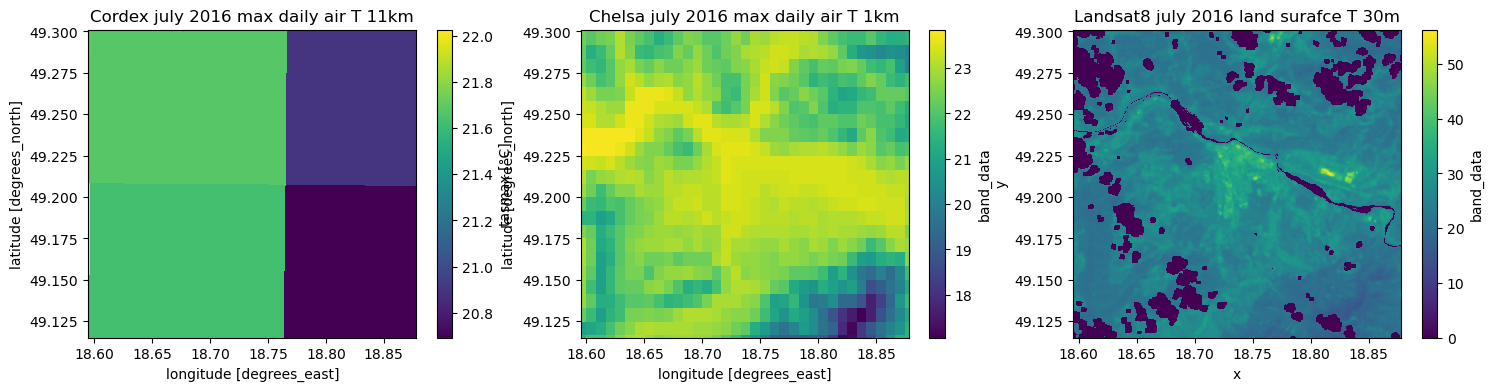

In [58]:
# Plot Cordex, Chelsa, Landsat
fig, axes=plt.subplots(ncols=3, figsize=(18,4))
ECmax84.plot(ax=axes[0])
axes[0].set_title('Cordex july 2016 max daily air T 11km')
CHZA84.plot(ax=axes[1])
axes[1].set_title('Chelsa july 2016 max daily air T 1km')
LS.plot(ax=axes[2])
axes[2].set_title('Landsat8 july 2016 land surafce T 30m')
plt.draw()

Text(0.5, 1.0, 'Sentinel2 NDVI july 2016 10m')

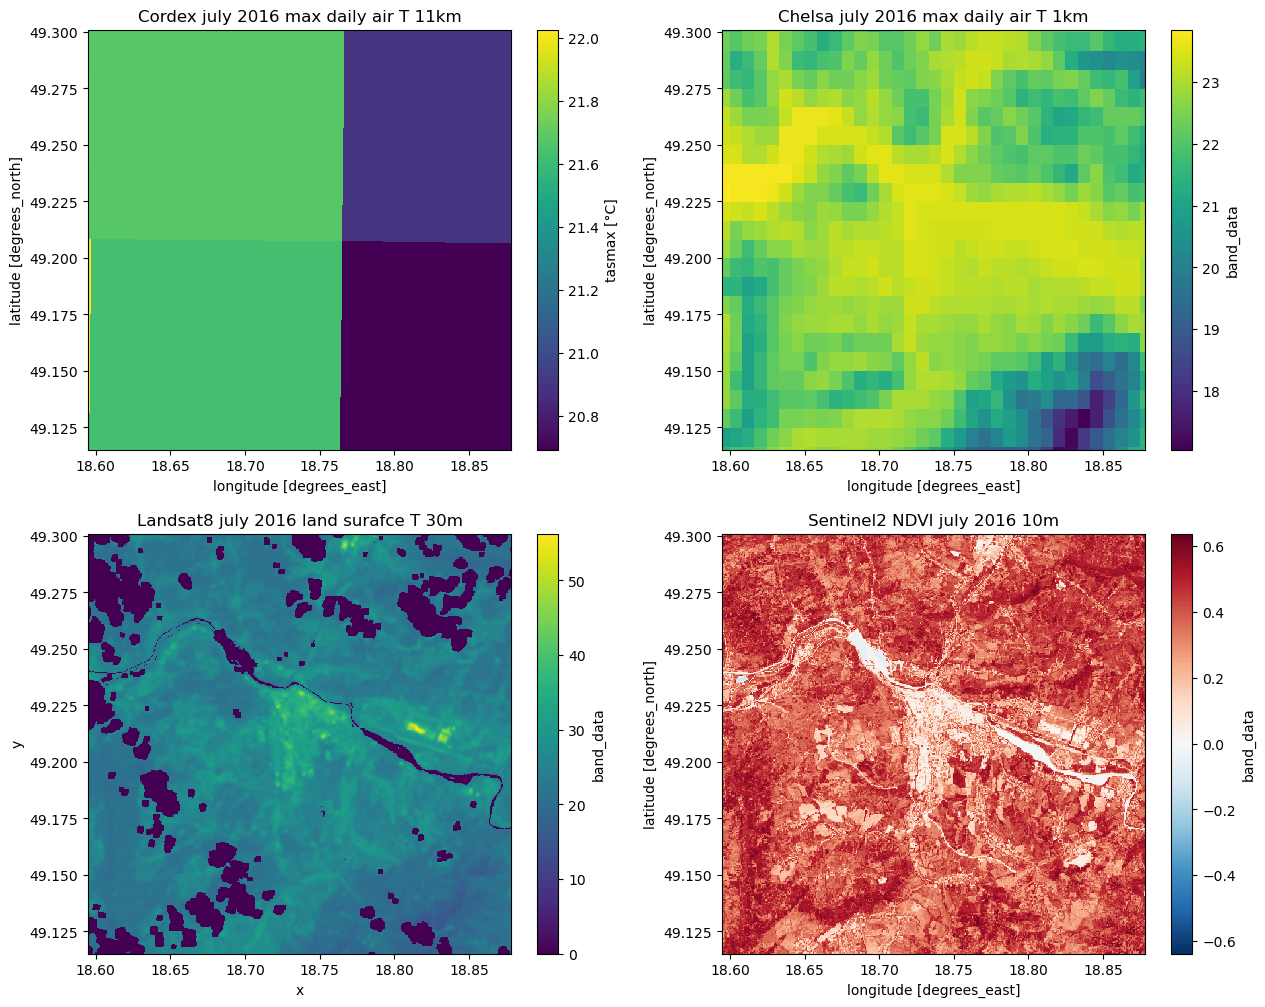

In [62]:
# Plot Cordex, Chelsa, Landsat
fig, axes=plt.subplots(ncols=2, nrows=2, figsize=(15,12))
ECmax84.plot(ax=axes[0,0])
axes[0,0].set_title('Cordex july 2016 max daily air T 11km')
#CI_WGS.plot(ax=axes[0,0], color='red')
CHZA84.plot(ax=axes[0,1])
axes[0,1].set_title('Chelsa july 2016 max daily air T 1km')
#CI_WGS.plot(ax=axes[0,1], color='red')
LS.plot(ax=axes[1,0])
axes[1,0].set_title('Landsat8 july 2016 land surafce T 30m')
#CI_WGS.plot(ax=axes[1,0], color='red')
S2NDVI84.plot(ax=axes[1,1])
axes[1,1].set_title('Sentinel2 NDVI july 2016 10m')
#CI_WGS.plot(ax=axes[1,1], color='green')